In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from calcSMA import calcSMA
from preprocess import read_trade_data

In [3]:
junk1, junk2, trades = read_trade_data('Bitfinex_BTCEUR_trades_2018_02_02.csv')

In [4]:
trades.head()

,price,amount,sell
date,,,
2018-02-02 02:00:08,7349.60000,0.004568,False
2018-02-02 02:00:09,7354.68045,0.010000,True
2018-02-02 02:00:09,7354.68045,0.004568,True
2018-02-02 02:00:10,7354.60000,0.102395,False
2018-02-02 02:00:26,7343.40750,0.086580,False


In [5]:
trades2 = trades['price'].resample('1T').mean()
trades2.interpolate(inplace = True)
trades2 = trades2.to_frame()
trades2.head()

,price
date,
2018-02-02 02:00:00,7351.364330
2018-02-02 02:01:00,7346.674273
2018-02-02 02:02:00,7341.799657
2018-02-02 02:03:00,7338.249829
2018-02-02 02:04:00,7334.700000


In [6]:
calcSMA(trades2, trades2['price'], 60)
trades2.head()

,price,SMA-60
date,,
2018-02-02 02:00:00,7351.364330,NaN
2018-02-02 02:01:00,7346.674273,NaN
2018-02-02 02:02:00,7341.799657,NaN
2018-02-02 02:03:00,7338.249829,NaN
2018-02-02 02:04:00,7334.700000,NaN


/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


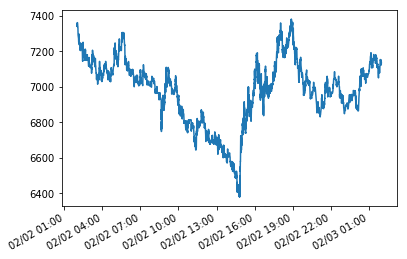

In [7]:
plt.plot(trades.index.values, trades['price'])
myFmt = mdates.DateFormatter('%m/%d %H:%M');
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


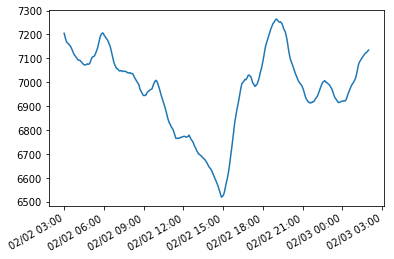

In [9]:
plt.plot(trades2.index.values, trades2['SMA-60'])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();